In [5]:
from Ownkey import API_Key
import requests
import pandas as pd

print(API_Key)



In [2]:
ticker = "X:ETHUSD"
multiplier = 1
timespan = "day"
start_date = "2024-01-09"
end_date = "2024-12-10"

url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/{multiplier}/{timespan}/{start_date}/{end_date}?apiKey={API_Key}"

#print(url)

response = requests.get(url)
data = response.json()

if "results" in data:
    df = pd.DataFrame(data["results"])

    df['t'] = pd.to_datetime(df['t'], unit='ms')

    df.rename(columns={'t': 'Date', 'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close', 'v': 'Volume'}, inplace=True)

    print(df.head())
else:
    print("Error fetching data:", data)


          Volume         vw     Open    Close     High      Low       Date  \
0  219634.471282  2296.0699  2332.52  2344.93  2376.10  2226.70 2024-01-09   
1  413907.625610  2449.2961  2344.97  2584.77  2644.42  2340.40 2024-01-10   
2  321015.376710  2615.4181  2584.85  2618.31  2691.07  2562.30 2024-01-11   
3  331635.239879  2608.8109  2618.37  2522.03  2717.89  2438.29 2024-01-12   
4  146103.438278  2550.1650  2522.02  2578.12  2589.97  2496.41 2024-01-13   

        n  
0  306351  
1  486514  
2  416065  
3  410601  
4  212182  


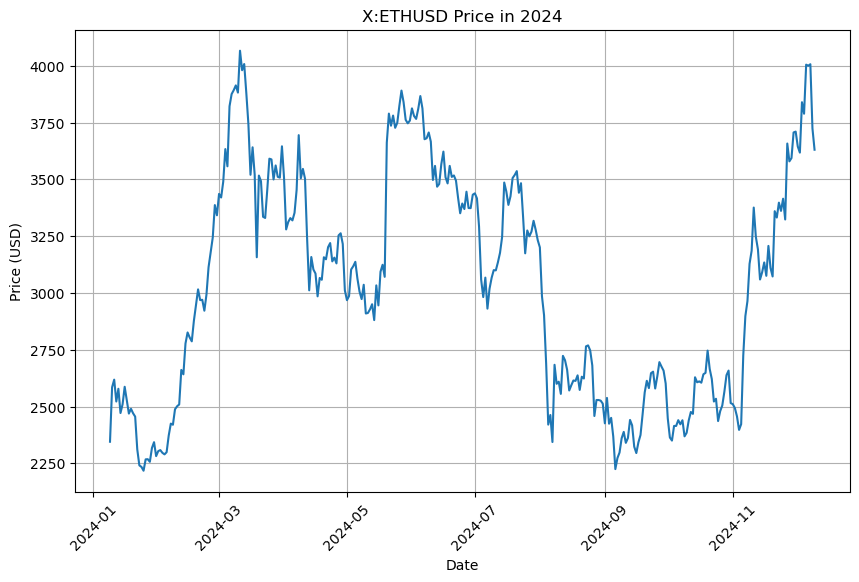

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'])
plt.title(f"{ticker} Price in 2024")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [18]:
# Converts to percentage
df['Returns'] = df['Close'].pct_change() * 100  


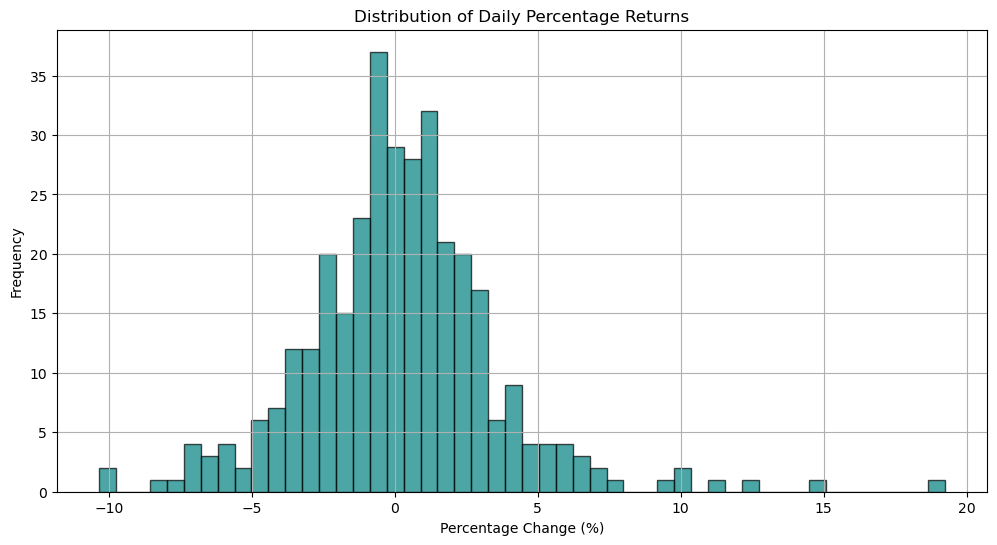

In [20]:
plt.figure(figsize=(12, 6))
plt.hist(df['Returns'].dropna(), bins=50, color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribution of Daily Percentage Returns')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
